In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [8]:
streetmap = gpd.read_file('CENSUS_TRACTS_2010/CENSUS_TRACTS_2010.shp')
streetmap.head()
type(streetmap)

geopandas.geodataframe.GeoDataFrame

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


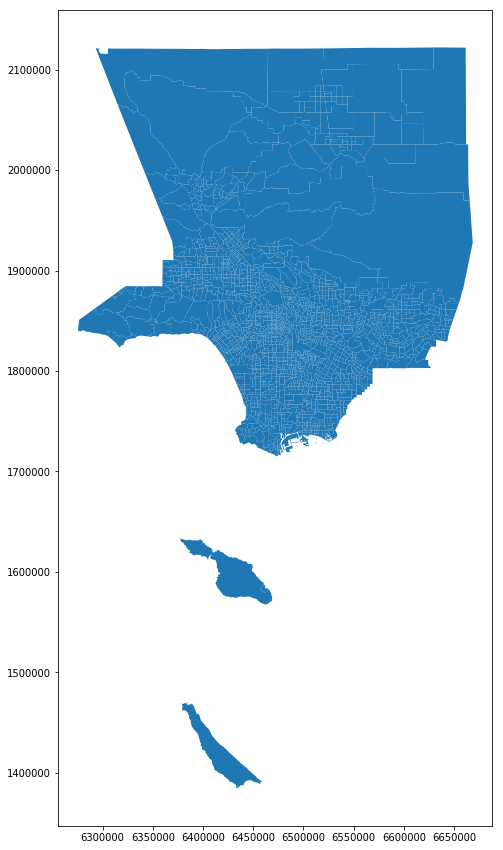

In [9]:
fig,ax = plt.subplots(figsize=(15,15))
streetmap.plot(ax=ax)
streetmap = streetmap.to_crs(epsg=4326)

In [13]:
df = pd.read_csv('2015_collisions.csv')
df = df.drop('Unnamed: 0', axis=1)
crs = {'init': 'epsg:4326'}
df.head()

,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,WEATHER_1,WEATHER_2,STATE_HWY_IND,COLLISION_SEVERITY,ROAD_SURFACE,LIGHTING,LATITUDE,LONGITUDE,CITY,POINT_X,POINT_Y
0,2015-01-15,1350,4,A,-,Y,1,A,A,34.07225,-117.78874,POMONA,-117.789745,34.072383
1,2015-02-18,1257,3,A,-,N,2,A,A,NaN,NaN,LAKEWOOD,-118.081970,33.838710
2,2015-02-21,2039,6,A,-,Y,1,A,C,NaN,NaN,PALMDALE,-118.112234,34.579560
3,2015-02-24,1700,2,A,-,Y,1,A,B,34.10310,-118.25006,LOS ANGELES,-118.249825,34.106312
4,2015-02-27,459,5,A,-,N,1,A,D,34.51632,-118.10387,UNINCORPORATED,-118.104109,34.516422


In [14]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = gpd.points_from_xy(df.POINT_Y,df.POINT_X))
geo_df.head()

,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,WEATHER_1,WEATHER_2,STATE_HWY_IND,COLLISION_SEVERITY,ROAD_SURFACE,LIGHTING,LATITUDE,LONGITUDE,CITY,POINT_X,POINT_Y,geometry
0,2015-01-15,1350,4,A,-,Y,1,A,A,34.07225,-117.78874,POMONA,-117.789745,34.072383,POINT (34.072 -117.790)
1,2015-02-18,1257,3,A,-,N,2,A,A,NaN,NaN,LAKEWOOD,-118.081970,33.838710,POINT (33.839 -118.082)
2,2015-02-21,2039,6,A,-,Y,1,A,C,NaN,NaN,PALMDALE,-118.112234,34.579560,POINT (34.580 -118.112)
3,2015-02-24,1700,2,A,-,Y,1,A,B,34.10310,-118.25006,LOS ANGELES,-118.249825,34.106312,POINT (34.106 -118.250)
4,2015-02-27,459,5,A,-,N,1,A,D,34.51632,-118.10387,UNINCORPORATED,-118.104109,34.516422,POINT (34.516 -118.104)


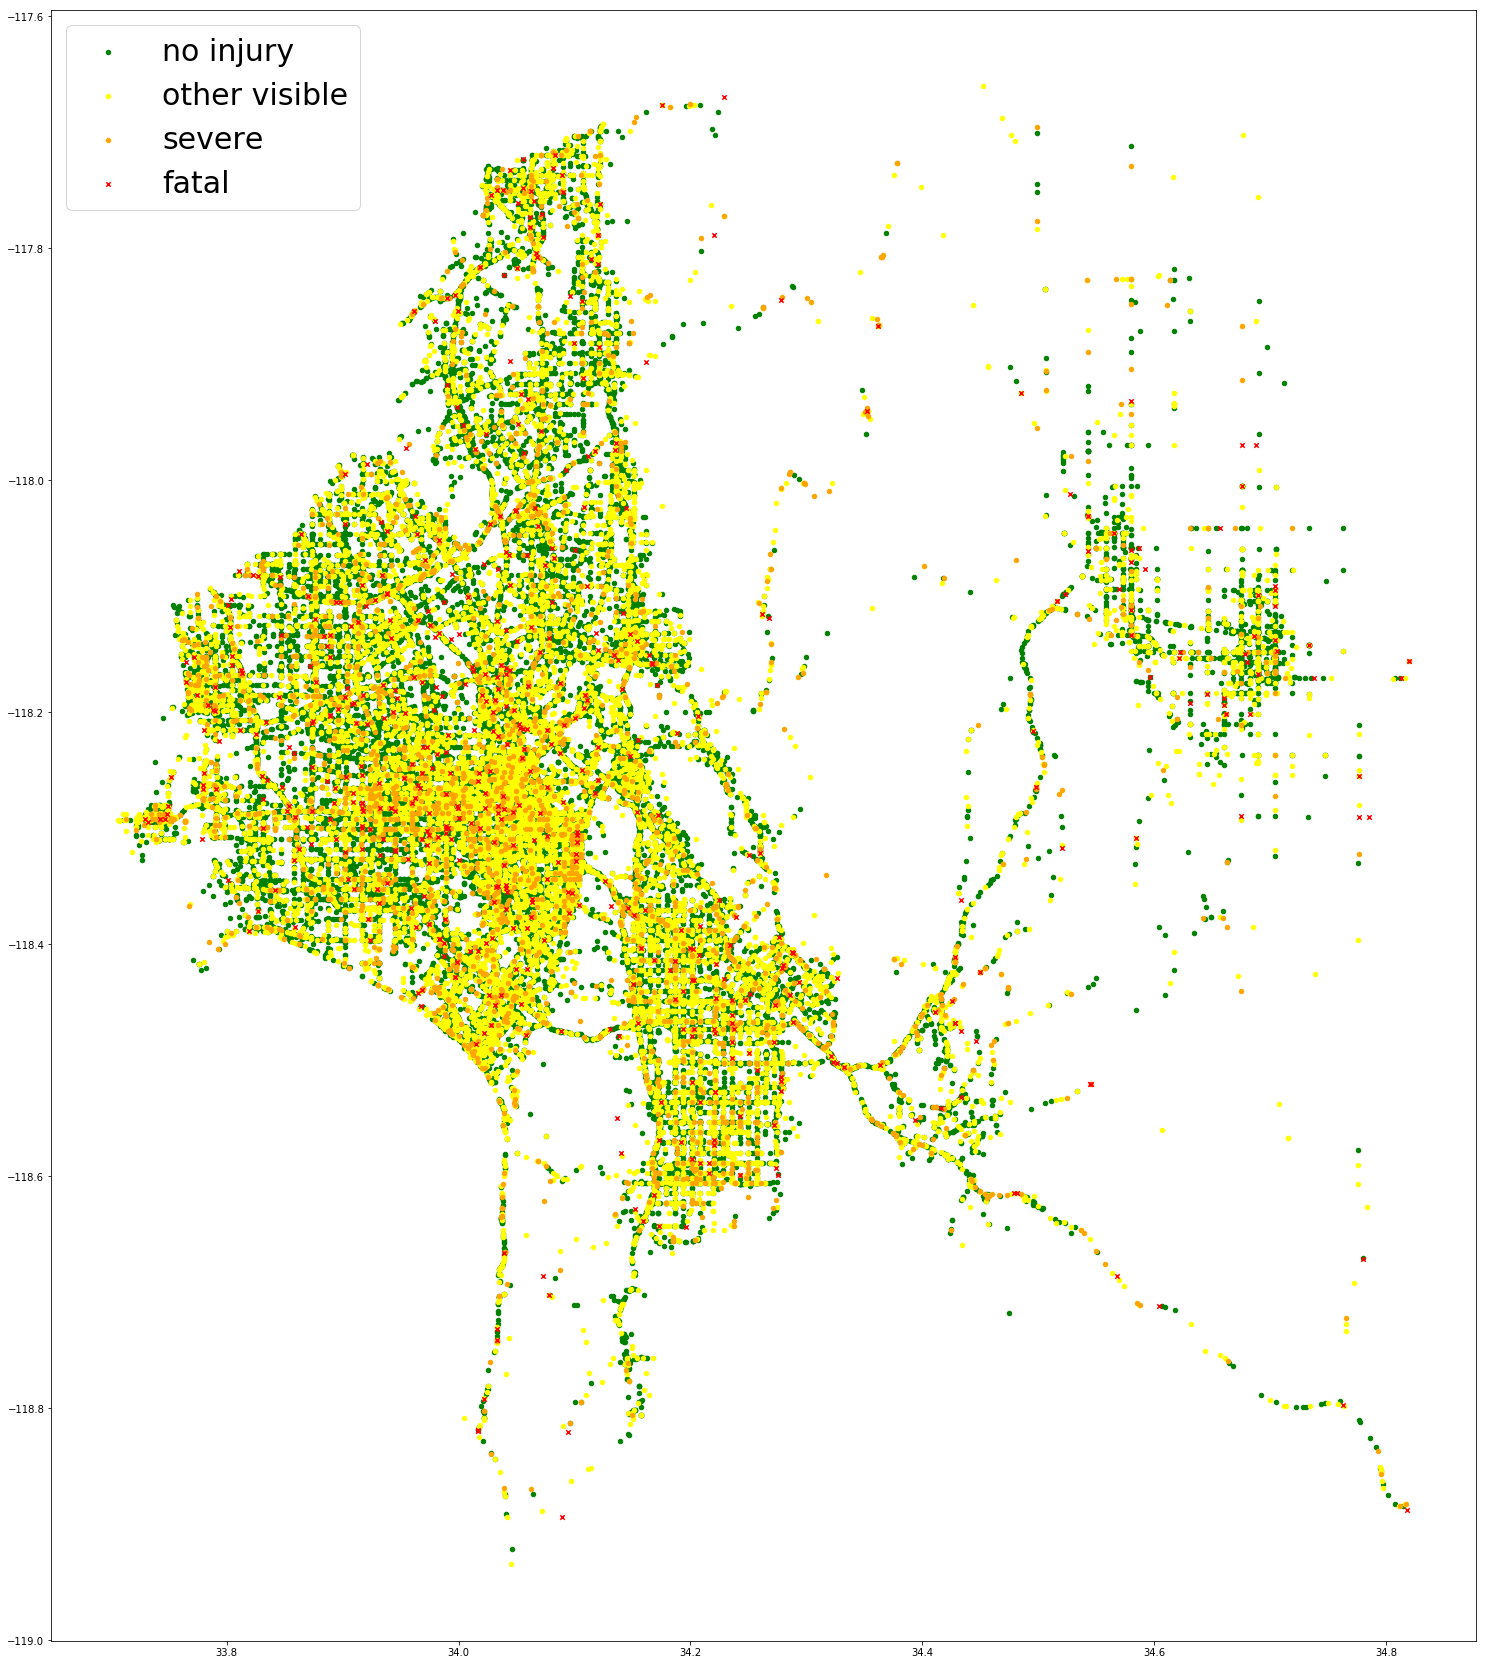

In [15]:
fix,ax = plt.subplots(figsize=(30,30))
# streetmap.plot(ax=ax, color = "grey")
geo_df[geo_df['COLLISION_SEVERITY'] == 4].plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "no injury")
geo_df[geo_df['COLLISION_SEVERITY'] == 3].plot(ax = ax, markersize = 20, color = "yellow", marker = "o", label = "other visible")
geo_df[geo_df['COLLISION_SEVERITY'] == 2].plot(ax = ax, markersize = 20, color = "orange", marker = "o", label = "severe")
geo_df[geo_df['COLLISION_SEVERITY'] == 1].plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "fatal")

plt.legend(prop={'size': 30})